# Reverse the whole of AR6

In [1]:
import pyam
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import silicone.database_crunchers as dc
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

<IPython.core.display.Javascript object>

# Import the whole of AR6 and classify it according to our criteria

In [2]:
ar6 = pyam.IamDataFrame("../input/AR6_Scenarios_Database_World_v1.0.csv")

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file ..\input\AR6_Scenarios_Database_World_v1.0.csv


In [3]:
ar6.load_meta("../input/AR6_Scenarios_Database_metadata_indicators_v1.0.xlsx")

pyam.core - WARNING: Reading meta indicators for 2298 out of 2430 scenarios, ignoring 6 scenarios from file


In [4]:
# filter out bad data with invalidly high 
ar6 = ar6.filter(model="TIAM-UCL*", scenario="*2020", keep=False)

In [5]:
temp = "AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|50.0th Percentile"
co2 = "Emissions|CO2"
ch4 = "Emissions|CH4"
years = np.arange(2010, 2101, 5)

In [6]:
ar6.meta

Category  \
model             scenario                          
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100      NaN   
                  ADVANCE_2020_Med2C          NaN   
                  ADVANCE_2020_WB2C           NaN   
                  ADVANCE_2030_Med2C          NaN   
                  ADVANCE_2030_Price1.5C      NaN   
...                                           ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi                 C7   
                  CD-LINKS_NPi2020_1000        C1   
                  CD-LINKS_NPi2020_1600        C3   
                  CD-LINKS_NPi2020_400         C1   
                  CD-LINKS_NoPolicy            C7   

                                                                              Category_name  \
model             scenario                                                                    
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100                                                NaN   
                  ADVANCE_2020_Med2C                                                    NaN   
                  ADVANCE_2020_WB2C                                                     NaN   
                  ADVANCE_2030_Med2C                                                    NaN   
                  ADVANCE_2030_Price1.5C                                                NaN   
...                                                                                     ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi                              C7: limit warming to 4°C (>50%)   
                  CD-LINKS_NPi2020_1000   C1: limit warming to 1.5°C (>50%) with no or l...   
                  CD-LINKS_NPi2020_1600                     C3: limit warming to 2°C (>67%)   
                  CD-LINKS_NPi2020_400    C1: limit warming to 1.5°C (>50%) with no or l...   
                  CD-LINKS_NoPolicy                         C7: limit warming to 4°C (>50%)   

                                               Category_subset Subset_Ch4  \
model             scenario                                                  
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100            C1a_NZGHGs        NaN   
                  ADVANCE_2020_Med2C                        C4        NaN   
                  ADVANCE_2020_WB2C                C1b_+veGHGs        NaN   
                  ADVANCE_2030_Med2C                        C4        NaN   
                  ADVANCE_2030_Price1.5C                    C2        NaN   
...                                                        ...        ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi                              C7        NaN   
                  CD-LINKS_NPi2020_1000             C1a_NZGHGs        NaN   
                  CD-LINKS_NPi2020_1600   C3a_Immediate_Action        NaN   
                  CD-LINKS_NPi2020_400              C1a_NZGHGs        NaN   
                  CD-LINKS_NoPolicy                         C7        NaN   

                                           Category_Vetting_historical  \
model             scenario                                               
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100  failed_Vetting_historical_C1   
                  ADVANCE_2020_Med2C      failed_Vetting_historical_C4   
                  ADVANCE_2020_WB2C       failed_Vetting_historical_C1   
                  ADVANCE_2030_Med2C      failed_Vetting_historical_C4   
                  ADVANCE_2030_Price1.5C  failed_Vetting_historical_C2   
...                                                                ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi                                      C7   
                  CD-LINKS_NPi2020_1000                             C1   
                  CD-LINKS_NPi2020_1600                             C3   
                  CD-LINKS_NPi2020_400                              C1   
                  CD-LINKS_NoPolicy                                 C7   

                                         IMP_marker  \
model             scenario                            
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100

In [7]:
ar6.set_meta_from_data("Has_temp", variable=temp, method=len)
ar6.meta

Category  \
model             scenario                          
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100      NaN   
                  ADVANCE_2020_Med2C          NaN   
                  ADVANCE_2020_WB2C           NaN   
                  ADVANCE_2030_Med2C          NaN   
                  ADVANCE_2030_Price1.5C      NaN   
...                                           ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi                 C7   
                  CD-LINKS_NPi2020_1000        C1   
                  CD-LINKS_NPi2020_1600        C3   
                  CD-LINKS_NPi2020_400         C1   
                  CD-LINKS_NoPolicy            C7   

                                                                              Category_name  \
model             scenario                                                                    
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100                                                NaN   
                  ADVANCE_2020_Med2C                                                    NaN   
                  ADVANCE_2020_WB2C                                                     NaN   
                  ADVANCE_2030_Med2C                                                    NaN   
                  ADVANCE_2030_Price1.5C                                                NaN   
...                                                                                     ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi                              C7: limit warming to 4°C (>50%)   
                  CD-LINKS_NPi2020_1000   C1: limit warming to 1.5°C (>50%) with no or l...   
                  CD-LINKS_NPi2020_1600                     C3: limit warming to 2°C (>67%)   
                  CD-LINKS_NPi2020_400    C1: limit warming to 1.5°C (>50%) with no or l...   
                  CD-LINKS_NoPolicy                         C7: limit warming to 4°C (>50%)   

                                               Category_subset Subset_Ch4  \
model             scenario                                                  
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100            C1a_NZGHGs        NaN   
                  ADVANCE_2020_Med2C                        C4        NaN   
                  ADVANCE_2020_WB2C                C1b_+veGHGs        NaN   
                  ADVANCE_2030_Med2C                        C4        NaN   
                  ADVANCE_2030_Price1.5C                    C2        NaN   
...                                                        ...        ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi                              C7        NaN   
                  CD-LINKS_NPi2020_1000             C1a_NZGHGs        NaN   
                  CD-LINKS_NPi2020_1600   C3a_Immediate_Action        NaN   
                  CD-LINKS_NPi2020_400              C1a_NZGHGs        NaN   
                  CD-LINKS_NoPolicy                         C7        NaN   

                                           Category_Vetting_historical  \
model             scenario                                               
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100  failed_Vetting_historical_C1   
                  ADVANCE_2020_Med2C      failed_Vetting_historical_C4   
                  ADVANCE_2020_WB2C       failed_Vetting_historical_C1   
                  ADVANCE_2030_Med2C      failed_Vetting_historical_C4   
                  ADVANCE_2030_Price1.5C  failed_Vetting_historical_C2   
...                                                                ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi                                      C7   
                  CD-LINKS_NPi2020_1000                             C1   
                  CD-LINKS_NPi2020_1600                             C3   
                  CD-LINKS_NPi2020_400                              C1   
                  CD-LINKS_NoPolicy                                 C7   

                                         IMP_marker  \
model             scenario                            
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100

In [8]:
assert len(ar6.meta["Has_temp"].drop_duplicates()) == 2
ar6.meta["Has_temp"].drop_duplicates()

model        scenario              
AIM/CGE 2.0  ADVANCE_2020_1.5C-2100    106.0
AIM/CGE 2.1  CO_2Deg2020                 NaN
Name: Has_temp, dtype: float64

In [9]:
tempcount = ar6.meta["Has_temp"].drop_duplicates()[0]

In [10]:
valid_temps_ar6 = ar6.filter(
    Has_temp=tempcount, variable=["Emissions|*", "*Surface Temperature (GSAT)|FaIRv1.6.2|*"], year=years
)

In [11]:
co2times = ar6.filter(variable=co2, Has_temp=tempcount, year=years).interpolate(years[1:-1])
co2timests = co2times.timeseries()

In [12]:
nzyear = "Year of netzero CO2 emissions (Harm-Infilled) table"
co2times.meta[nzyear]

model              scenario              
AIM/CGE 2.0        ADVANCE_2020_1.5C-2100    2044.0
                   ADVANCE_2020_Med2C           NaN
                   ADVANCE_2020_WB2C         2059.0
                   ADVANCE_2030_Med2C           NaN
                   ADVANCE_2030_Price1.5C    2047.0
                                              ...  
WITCH-GLOBIOM 4.4  CD-LINKS_NPi                 NaN
                   CD-LINKS_NPi2020_1000     2076.0
                   CD-LINKS_NPi2020_1600     2095.0
                   CD-LINKS_NPi2020_400      2055.0
                   CD-LINKS_NoPolicy            NaN
Name: Year of netzero CO2 emissions (Harm-Infilled) table, Length: 1678, dtype: float64

In [13]:
co22030rat = co2timests[2030] / co2timests[2020]
co22030rat.index = co22030rat.index.droplevel(["variable", "unit", "region"])
co22030rat.name = "factor2030"
co22030rat

model              scenario              
AIM/CGE 2.0        ADVANCE_2020_1.5C-2100    0.480011
                   ADVANCE_2020_Med2C        0.543255
                   ADVANCE_2020_WB2C         0.543425
                   ADVANCE_2030_Med2C        0.945143
                   ADVANCE_2030_Price1.5C    0.936908
                                               ...   
WITCH-GLOBIOM 4.4  CD-LINKS_NPi              1.251842
                   CD-LINKS_NPi2020_1000     0.510759
                   CD-LINKS_NPi2020_1600     0.717518
                   CD-LINKS_NPi2020_400      0.379542
                   CD-LINKS_NoPolicy         1.229468
Name: factor2030, Length: 1678, dtype: float64

In [14]:
minco2 = co2timests.min(axis=1)
minco2.name = "overshoot"
minco2.index = minco2.index.droplevel(["variable", "unit", "region"])
minco2

model              scenario              
AIM/CGE 2.0        ADVANCE_2020_1.5C-2100    -9964.356400
                   ADVANCE_2020_Med2C         7758.438200
                   ADVANCE_2020_WB2C         -2459.894600
                   ADVANCE_2030_Med2C         5286.630300
                   ADVANCE_2030_Price1.5C    -7435.738600
                                                 ...     
WITCH-GLOBIOM 4.4  CD-LINKS_NPi              35674.120803
                   CD-LINKS_NPi2020_1000     -8298.142767
                   CD-LINKS_NPi2020_1600     -1964.924847
                   CD-LINKS_NPi2020_400     -14723.049290
                   CD-LINKS_NoPolicy         35674.120803
Name: overshoot, Length: 1678, dtype: float64

In [15]:
np.isfinite(co2timests).sum()

2010    1621
2015    1678
2020    1678
2025    1678
2030    1678
2035    1678
2040    1678
2045    1678
2050    1678
2055    1678
2060    1678
2065    1678
2070    1678
2075    1678
2080    1678
2085    1678
2090    1678
2095    1678
2100    1678
dtype: int64

In [16]:
methane_dict = {}
methane_error = {}
methane_ts = valid_temps_ar6.filter(variable=ch4).timeseries()
methane_cr = dc.QuantileRollingWindows(valid_temps_ar6)
levels = np.round(np.arange(0.05, 1.0, 0.05), 3)
for level in levels:
    methane_dict[level] = methane_cr.derive_relationship(ch4, [co2], level)(co2times).timeseries()
    methane_error[level] = np.nanmean((methane_dict[level] - methane_ts)**2, axis=1)

C:\Users\rlamboll\Anaconda3\envs\silicone-1\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  


In [17]:
methane_score = pd.DataFrame(methane_error, columns=levels, index=methane_dict[0.5].index)
methane_score

0.05  \
model             scenario               region variable      unit                      
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100 World  Emissions|CH4 Mt CH4/yr    865.503581   
                  ADVANCE_2020_Med2C     World  Emissions|CH4 Mt CH4/yr   5218.451646   
                  ADVANCE_2020_WB2C      World  Emissions|CH4 Mt CH4/yr   2241.048708   
                  ADVANCE_2030_Med2C     World  Emissions|CH4 Mt CH4/yr   5586.832334   
                  ADVANCE_2030_Price1.5C World  Emissions|CH4 Mt CH4/yr   2776.468706   
...                                                                               ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi           World  Emissions|CH4 Mt CH4/yr  39661.999581   
                  CD-LINKS_NPi2020_1000  World  Emissions|CH4 Mt CH4/yr    900.620616   
                  CD-LINKS_NPi2020_1600  World  Emissions|CH4 Mt CH4/yr    910.496619   
                  CD-LINKS_NPi2020_400   World  Emissions|CH4 Mt CH4/yr    907.583280   
                  CD-LINKS_NoPolicy      World  Emissions|CH4 Mt CH4/yr  50604.173451   

                                                                                 0.10  \
model             scenario               region variable      unit                      
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100 World  Emissions|CH4 Mt CH4/yr    602.838392   
                  ADVANCE_2020_Med2C     World  Emissions|CH4 Mt CH4/yr   3705.701528   
                  ADVANCE_2020_WB2C      World  Emissions|CH4 Mt CH4/yr   1161.591674   
                  ADVANCE_2030_Med2C     World  Emissions|CH4 Mt CH4/yr   3684.753590   
                  ADVANCE_2030_Price1.5C World  Emissions|CH4 Mt CH4/yr   1606.464445   
...                                                                               ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi           World  Emissions|CH4 Mt CH4/yr  28630.136846   
                  CD-LINKS_NPi2020_1000  World  Emissions|CH4 Mt CH4/yr    539.835624   
                  CD-LINKS_NPi2020_1600  World  Emissions|CH4 Mt CH4/yr    562.234154   
                  CD-LINKS_NPi2020_400   World  Emissions|CH4 Mt CH4/yr    592.791439   
                  CD-LINKS_NoPolicy      World  Emissions|CH4 Mt CH4/yr  38080.261742   

                                                                                 0.15  \
model             scenario               region variable      unit                      
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100 World  Emissions|CH4 Mt CH4/yr    642.961586   
                  ADVANCE_2020_Med2C     World  Emissions|CH4 Mt CH4/yr   3188.944670   
                  ADVANCE_2020_WB2C      World  Emissions|CH4 Mt CH4/yr    867.957761   
                  ADVANCE_2030_Med2C     World  Emissions|CH4 Mt CH4/yr   3002.706742   
                  ADVANCE_2030_Price1.5C World  Emissions|CH4 Mt CH4/yr   1172.868795   
...                                                                               ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi           World  Emissions|CH4 Mt CH4/yr  21205.964214   
                  CD-LINKS_NPi2020_1000  World  Emissions|CH4 Mt CH4/yr    594.842944   
                  CD-LINKS_NPi2020_1600  World  Emissions|CH4 Mt CH4/yr    666.867976   
                  CD-LINKS_NPi2020_400   World  Emissions|CH4 Mt CH4/yr    691.324355   
                  CD-LINKS_NoPolicy      World  Emissions|CH4 Mt CH4/yr  29371.694480   

                                                                                 0.20  \
model             scenario               region variable      unit                      
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100 World  Emissions|CH4 Mt CH4/yr    792.396270   
                  ADVANCE_2020_Med2C     World  Emissions|CH4 Mt CH4/yr   2788.896041   
                  ADVANCE_2020_WB2C      World  Emissions|CH4 Mt CH4/yr    742.778282   
                  ADVANCE_2030_Med2C     World  Emissions|CH4 Mt CH4/yr   2520.690552   
                  ADVANCE_2030_Price1.5C World  Emissions|CH4 Mt CH4/yr  

In [18]:
methts = methane_score.idxmin(axis=1)
methts.index = methts.index.droplevel(["variable", "unit", "region"])
methts.name = "methane"
methts

model              scenario              
AIM/CGE 2.0        ADVANCE_2020_1.5C-2100    0.10
                   ADVANCE_2020_Med2C        0.50
                   ADVANCE_2020_WB2C         0.35
                   ADVANCE_2030_Med2C        0.55
                   ADVANCE_2030_Price1.5C    0.30
                                             ... 
WITCH-GLOBIOM 4.4  CD-LINKS_NPi              0.45
                   CD-LINKS_NPi2020_1000     0.10
                   CD-LINKS_NPi2020_1600     0.10
                   CD-LINKS_NPi2020_400      0.10
                   CD-LINKS_NoPolicy         0.55
Name: methane, Length: 1678, dtype: float64

In [19]:
valid_temps_ar6.filter(variable="*Temp*").variable

['AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|10.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|16.7th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|33.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|5.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|50.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|67.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|83.3th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|90.0th Percentile',
 'AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|95.0th Percentile']

In [20]:
nz = "Year of netzero CO2 emissions (Harm-Infilled) table"
temp_basename = "AR6 climate diagnostics|Surface Temperature (GSAT)|FaIRv1.6.2|{}th Percentile"
results = []
for percentile in ["10.0", "33.0", "50.0", "67.0", "90.0"]:
    tempts = valid_temps_ar6.filter(variable=temp_basename.format(percentile)).timeseries()
    tempts.index = tempts.index.droplevel(["variable", "unit", "region"])
    tempts["quantile"] = np.float64(percentile) / 100
    results_t = pd.concat([tempts, methts, co2times.meta[nzyear], minco2, co22030rat], axis=1)
    results.append(results_t)
results = pd.concat(results)
results

2010      2015      2020  \
model             scenario                                               
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100  0.829593  0.945013  1.052415   
                  ADVANCE_2020_Med2C      0.829593  0.945013  1.052355   
                  ADVANCE_2020_WB2C       0.829593  0.945013  1.052452   
                  ADVANCE_2030_Med2C      0.829593  0.945013  1.052931   
                  ADVANCE_2030_Price1.5C  0.829593  0.945013  1.052959   
...                                            ...       ...       ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi            1.112558  1.266891  1.417933   
                  CD-LINKS_NPi2020_1000   1.112558  1.266891  1.417847   
                  CD-LINKS_NPi2020_1600   1.112558  1.266891  1.417852   
                  CD-LINKS_NPi2020_400    1.112558  1.266891  1.418138   
                  CD-LINKS_NoPolicy       1.112558  1.266891  1.421759   

                                              2025      2030      2035  \
model             scenario                                               
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100  1.158696  1.155629  1.147528   
                  ADVANCE_2020_Med2C      1.160971  1.167657  1.176005   
                  ADVANCE_2020_WB2C       1.161197  1.166231  1.169169   
                  ADVANCE_2030_Med2C      1.161108  1.219170  1.292537   
                  ADVANCE_2030_Price1.5C  1.161651  1.221231  1.293259   
...                                            ...       ...       ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi            1.572460  1.688500  1.843170   
                  CD-LINKS_NPi2020_1000   1.583042  1.647222  1.676616   
                  CD-LINKS_NPi2020_1600   1.575398  1.648163  1.716005   
                  CD-LINKS_NPi2020_400    1.588046  1.646055  1.658263   
                  CD-LINKS_NoPolicy       1.580533  1.704375  1.867969   

                                              2040      2045      2050  \
model             scenario                                               
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100  1.132919  1.095162  1.081622   
                  ADVANCE_2020_Med2C      1.192991  1.207437  1.249167   
                  ADVANCE_2020_WB2C       1.168084  1.151873  1.165692   
                  ADVANCE_2030_Med2C      1.326514  1.322140  1.342548   
                  ADVANCE_2030_Price1.5C  1.300107  1.268205  1.250079   
...                                            ...       ...       ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi            2.043969  2.252216  2.511598   
                  CD-LINKS_NPi2020_1000   1.706817  1.719573  1.772846   
                  CD-LINKS_NPi2020_1600   1.782165  1.821731  1.898270   
                  CD-LINKS_NPi2020_400    1.669296  1.657997  1.678087   
                  CD-LINKS_NoPolicy       2.079440  2.295300  2.559937   

                                              2055  ...      2080      2085  \
model             scenario                          ...                       
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100  1.039401  ...  0.912780  0.891601   
                  ADVANCE_2020_Med2C      1.255286  ...  1.335186  1.362302   
                  ADVANCE_2020_WB2C       1.142718  ...  1.102450  1.110298   
                  ADVANCE_2030_Med2C      1.331490  ...  1.407414  1.436774   
                  ADVANCE_2030_Price1.5C  1.201343  ...  1.110667  1.105885   
...                                            ...  ...       ...       ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi            2.723484  ...  3.788669  4.004075   
                  CD-LINKS_NPi2020_1000   1.791192  ...  1.857061  1.864707   
                  CD-LINKS_NPi2020_1600   1.933999  ...  2.148508  2.172879   
                  CD-LINKS_NPi2020_400    1.659304  ...  1.589258  1.559545   
                  CD-LINKS_NoPolicy       2.776777  ...  3.865393  4.083771   

                                              2090      2095      2100  \
model             scenario                             

In [21]:
results["overshootreduced"] = results["overshoot"] / 10000
results["nzreduced"] = (results[nz] - 2000) / 100
labelcols = ["methane", "factor2030", "overshootreduced", "nzreduced"]

In [22]:
badcols = [nz, "overshoot"]
valid_results = results[np.isfinite(results[nz]) & ~np.isnan(results["methane"])].drop(badcols, axis=1)
valid_results

2010      2015      2020  \
model             scenario                                                
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100   0.829593  0.945013  1.052415   
                  ADVANCE_2020_WB2C        0.829593  0.945013  1.052452   
                  ADVANCE_2030_Price1.5C   0.829593  0.945013  1.052959   
                  ADVANCE_2030_WB2C        0.829593  0.945013  1.052972   
                  EMF30_ClimPolicy         0.829593  0.945013  1.049739   
...                                             ...       ...       ...   
WITCH-GLOBIOM 4.4 CD-LINKS_INDC2030i_1600  1.112558  1.266891  1.421037   
                  CD-LINKS_NDC2030i_1000   1.112558  1.266891  1.420837   
                  CD-LINKS_NPi2020_1000    1.112558  1.266891  1.417847   
                  CD-LINKS_NPi2020_1600    1.112558  1.266891  1.417852   
                  CD-LINKS_NPi2020_400     1.112558  1.266891  1.418138   

                                               2025      2030      2035  \
model             scenario                                                
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100   1.158696  1.155629  1.147528   
                  ADVANCE_2020_WB2C        1.161197  1.166231  1.169169   
                  ADVANCE_2030_Price1.5C   1.161651  1.221231  1.293259   
                  ADVANCE_2030_WB2C        1.161246  1.220154  1.293962   
                  EMF30_ClimPolicy         1.148171  1.163387  1.179687   
...                                             ...       ...       ...   
WITCH-GLOBIOM 4.4 CD-LINKS_INDC2030i_1600  1.569524  1.661854  1.779090   
                  CD-LINKS_NDC2030i_1000   1.568781  1.661202  1.783935   
                  CD-LINKS_NPi2020_1000    1.583042  1.647222  1.676616   
                  CD-LINKS_NPi2020_1600    1.575398  1.648163  1.716005   
                  CD-LINKS_NPi2020_400     1.588046  1.646055  1.658263   

                                               2040      2045      2050  \
model             scenario                                                
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100   1.132919  1.095162  1.081622   
                  ADVANCE_2020_WB2C        1.168084  1.151873  1.165692   
                  ADVANCE_2030_Price1.5C   1.300107  1.268205  1.250079   
                  ADVANCE_2030_WB2C        1.326703  1.318774  1.314088   
                  EMF30_ClimPolicy         1.203041  1.211995  1.248548   
...                                             ...       ...       ...   
WITCH-GLOBIOM 4.4 CD-LINKS_INDC2030i_1600  1.890023  1.945038  2.012568   
                  CD-LINKS_NDC2030i_1000   1.879573  1.908165  1.952074   
                  CD-LINKS_NPi2020_1000    1.706817  1.719573  1.772846   
                  CD-LINKS_NPi2020_1600    1.782165  1.821731  1.898270   
                  CD-LINKS_NPi2020_400     1.669296  1.657997  1.678087   

                                               2055  ...      2080      2085  \
model             scenario                           ...                       
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100   1.039401  ...  0.912780  0.891601   
                  ADVANCE_2020_WB2C        1.142718  ...  1.102450  1.110298   
                  ADVANCE_2030_Price1.5C   1.201343  ...  1.110667  1.105885   
                  ADVANCE_2030_WB2C        1.269733  ...  1.162728  1.160886   
                  EMF30_ClimPolicy         1.243542  ...  1.238675  1.236398   
...                                             ...  ...       ...       ...   
WITCH-GLOBIOM 4.4 CD-LINKS_INDC2030i_1600  2.033220  ...  2.188182  2.201324   
                  CD-LINKS_NDC2030i_1000   1.949162  ...  1.928163  1.924041   
                  CD-LINKS_NPi2020_1000    1.791192  ...  1.857061  1.864707   
                  CD-LINKS_NPi2020_1600    1.933999  ...  2.148508  2.172879   
                  CD-LINKS_NPi2020_400     1.659304  ...  1.589258  1.559545   

                                               2090      2095      2100  \
mod

In [23]:
np.sort(valid_results["nzreduced"])

array([0.24, 0.24, 0.24, ..., 1.  , 1.  , 1.  ])

# Try to linear regression to get emissions statistics from the temp data
We try with and without PCA

In [24]:
tempcols = [c for c in valid_results.columns if c not in labelcols]
train, test, res_train, res_test = train_test_split(
    valid_results.loc[:, tempcols], valid_results.loc[:, labelcols], test_size = 0.2, random_state = 4
)

In [25]:
assert "quantile" in tempcols

In [26]:
np.isnan(res_test).sum()

methane             0
factor2030          0
overshootreduced    0
nzreduced           0
dtype: int64

In [27]:
regression = linear_model.LinearRegression()
lin_model = regression.fit(train.values, res_train)
score = lin_model.score(test.values, res_test)
score

0.5115213680750266

In [28]:
# Then try with PCA
pca_results = []
for dec in range(4, 11):
    decomposers = sklearn.decomposition.PCA(dec).fit(train.values)
    pca_train = decomposers.transform(train.values)
    pca_test = decomposers.transform(test.values)
    for pol in range(1, 8):
        poly = PolynomialFeatures(degree=pol)
        poly_train = poly.fit_transform(pca_train)
        poly_test = poly.fit_transform(pca_test)
        regression = linear_model.LinearRegression()
        poly_model = regression.fit(poly_train, res_train)
        score = poly_model.score(poly_test, res_test)
        pca_results.append([dec, pol, score])

In [29]:
pca_results_table = pd.DataFrame(pca_results, columns=["PCA", "Polynomials", "score"])
pca_results_table

,PCA,Polynomials,score
0,4,1,0.398175
1,4,2,0.442890
2,4,3,0.475948
3,4,4,0.520116
4,4,5,0.575429
5,4,6,0.605166
6,4,7,0.486797
7,5,1,0.428256
8,5,2,0.489876
9,5,3,0.556400


In [30]:
pca_results_table[pca_results_table["score"]==max(pca_results_table["score"])]

,PCA,Polynomials,score
24,7,4,0.721763


In [31]:
# Repeat the best value to analyse
dec = 7
decomposers = sklearn.decomposition.PCA(dec).fit(train.values)
pca_train = decomposers.transform(train.values)
pca_test = decomposers.transform(test.values)
pol = 4
poly = PolynomialFeatures(degree=pol)
poly_train = poly.fit_transform(pca_train)
poly_test = poly.fit_transform(pca_test)
regression = linear_model.LinearRegression()
poly_model = regression.fit(poly_train, res_train)
score = poly_model.score(poly_test, res_test)
predicted = poly_model.predict(poly_test)

In [32]:
res_test

,,methane,factor2030,overshootreduced,nzreduced
model,scenario,,,,
IMAGE 3.0.1,SSP2-26,0.45,0.721283,-0.524150,0.69
MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1800f_COV,0.25,0.870141,-0.343701,0.92
REMIND 2.1,CEMICS_Linear_2C,0.60,0.837669,-0.472660,0.77
MESSAGE-GLOBIOM 1.0,SSP1-19,0.15,0.614381,-1.548708,0.51
WITCH 5.0,EN_INDCi2030_1400,0.20,0.960008,-0.161931,0.94
...,...,...,...,...,...
AIM/CGE 2.0,EMF30_ClimPolicy,0.40,0.597282,-0.444680,0.79
MESSAGEix-GLOBIOM_GEI 1.0,SSP2_openres_lc_CB450,0.25,0.606314,-1.818894,0.51
GRAPE-15 1.0,EMF33_1.5C_nofuel,0.95,0.486290,-1.270500,0.56


In [33]:
res_test[res_test["factor2030"]<0]

methane  factor2030  overshootreduced  nzreduced
model    scenario                                                            
GCAM 4.2 EMF33_WB2C_nobeccs     0.85   -1.582794         -0.875685       0.25
         EMF33_WB2C_none        0.85   -1.712643         -0.864605       0.24
GCAM 5.3 R_MAC_30_n0            0.85   -0.000009         -0.000038       0.30
GCAM 4.2 EMF33_WB2C_none        0.85   -1.712643         -0.864605       0.24
         EMF33_WB2C_nobeccs     0.85   -1.582794         -0.875685       0.25

In [34]:
ar6.filter(scenario="EMF33_WB2C_none", variable=co2).timeseries()

,,,,,2005,2010,2015,2020,2025,2030,2040,2050,2060,2070,2080,2090,2100,2000,2035,2045,2055
model,scenario,region,variable,unit,,,,,,,,,,,,,,,,,
DNE21+ V.14E2,EMF33_WB2C_none,World,Emissions|CO2,Mt CO2/yr,30691.424217,36287.774810,39240.99275,39794.325523,15281.114672,12612.207516,10712.605066,8438.397494,4688.643571,1082.167785,-768.339098,-2368.845981,-3779.352864,NaN,NaN,NaN,NaN
FARM 3.2,EMF33_WB2C_none,World,Emissions|CO2,Mt CO2/yr,NaN,32354.590843,NaN,37343.944278,NaN,18285.655951,9612.998686,7216.775701,6371.437893,5568.398888,4773.734448,3975.560821,3189.477729,NaN,NaN,NaN,NaN
GCAM 4.2,EMF33_WB2C_none,World,Emissions|CO2,Mt CO2/yr,31911.312927,35793.127826,NaN,4269.077230,NaN,-7311.403348,-813.605916,3017.524949,3212.793945,1364.317360,-1470.663345,-4481.140771,-8646.052075,NaN,NaN,NaN,NaN
POLES EMF33,EMF33_WB2C_none,World,Emissions|CO2,Mt CO2/yr,30911.814453,34045.156250,NaN,38496.941406,NaN,15526.725586,6368.479980,4259.015625,3078.027588,2532.229736,2020.303101,1213.258789,428.122772,26158.984375,NaN,NaN,NaN
REMIND-MAgPIE 1.7-3.0,EMF33_WB2C_none,World,Emissions|CO2,Mt CO2/yr,32402.557500,34797.856400,39213.12850,42654.000200,32188.117500,21411.533000,8652.054700,5027.572500,2976.173700,2530.191900,1815.651700,22.663800,-887.535100,NaN,12890.2452,6495.8743,3986.6215


[array([[1.        , 0.61494638],
        [0.61494638, 1.        ]]),
 array([[1.        , 0.92979981],
        [0.92979981, 1.        ]]),
 array([[1.        , 0.94699136],
        [0.94699136, 1.        ]]),
 array([[1.        , 0.88210755],
        [0.88210755, 1.        ]])]

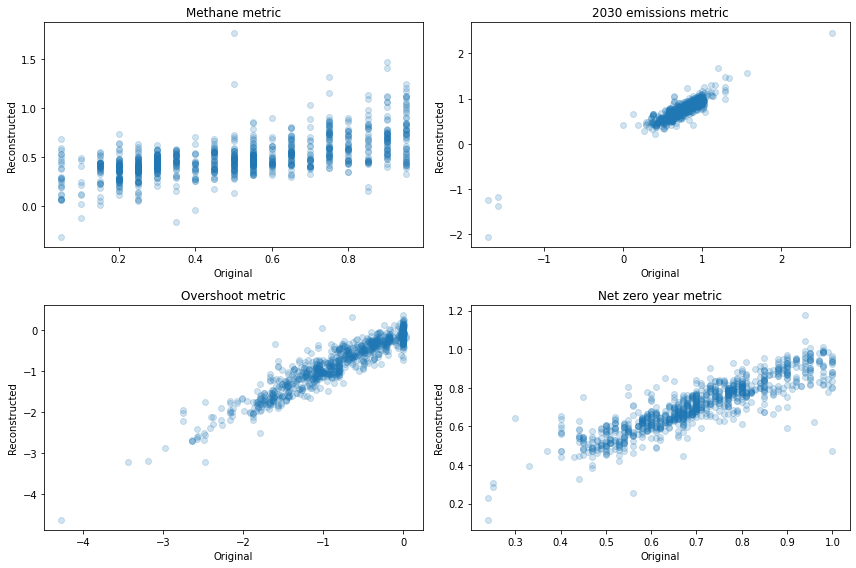

In [35]:
plt.figure(figsize=(12, 8))
corcoefs = []
titles = [ "Methane metric", "2030 emissions metric", "Overshoot metric", "Net zero year metric"]
for i in range(4):
    ax=plt.subplot(2, 2, i+1)
    plt.scatter(res_test.iloc[:, i], predicted[:, i], alpha=0.2)
    plt.title(titles[i])
    plt.xlabel("Original")
    plt.ylabel("Reconstructed")
    corcoefs.append(np.corrcoef(res_test.iloc[:, i], predicted[:, i]))
plt.tight_layout()
corcoefs

# Look for random forest methods


In [36]:
randforest_results = []
for dec in range(3, 13):
    decomposers = sklearn.decomposition.PCA(dec).fit(train.values)
    pca_train = decomposers.transform(train.values)
    pca_test = decomposers.transform(test.values)
    for pol in range(1, 10):
        poly = PolynomialFeatures(degree=pol)
        poly_train = poly.fit_transform(pca_train)
        poly_test = poly.fit_transform(pca_test)
        randforest = DecisionTreeRegressor()
        randforest = randforest.fit(pca_train, res_train)
        score = randforest.score(pca_test, res_test)
        randforest_results.append([dec, pol, score])

In [37]:
randforest_results_table = pd.DataFrame(randforest_results, columns=["PCA", "Polynomials", "score"])
randforest_results_table

,PCA,Polynomials,score
0,3,1,0.083410
1,3,2,0.091661
2,3,3,0.091114
3,3,4,0.091807
4,3,5,0.083709
...,...,...,...
85,12,5,0.487241
86,12,6,0.480329
87,12,7,0.500561
88,12,8,0.498695


In [38]:
randforest_results_table[randforest_results_table["score"]==max(randforest_results_table["score"])]

,PCA,Polynomials,score
67,10,5,0.543269


This isn't very good. Go back to PCA. 
# Add the constructed data too to see if this improves results

In [39]:
version_str = "v4"
output_dir = f"../output/{version_str}/fair/"
date_str = "2022-02-14"
temps = pd.read_csv("{}fair_output_quantiles_{}_{}.csv".format(output_dir, date_str, version_str))
fair_df = pd.read_csv('{}fair_output_raw_{}_{}.csv'.format(output_dir, date_str, version_str), index_col=0)
fair_df

,scenario,1765,1766,1767,1768,1769,1770,1771,1772,1773,...,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300
0,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.002751,0.005241,0.007940,0.012981,0.018950,0.025513,0.029475,0.030094,0.030464,...,0.312867,0.310305,0.307748,0.305196,0.302648,0.300105,0.297567,0.295033,0.292504,0.289980
1,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.003864,0.007122,0.010898,0.020395,0.031454,0.043210,0.047838,0.043892,0.041129,...,0.325923,0.322226,0.318540,0.314863,0.311197,0.307541,0.303895,0.300260,0.296635,0.293022
2,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.015027,0.025776,0.035114,0.046443,0.057942,0.069351,0.076312,0.077298,0.078463,...,0.404382,0.401322,0.398268,0.395220,0.392179,0.389145,0.386117,0.383095,0.380081,0.377073
3,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.003456,0.005529,0.007669,0.012386,0.017598,0.022956,0.024841,0.023868,0.022721,...,0.401651,0.398589,0.395533,0.392484,0.389440,0.386403,0.383372,0.380348,0.377330,0.374319
4,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.005983,0.010959,0.015759,0.022375,0.029606,0.037201,0.042308,0.042533,0.043916,...,0.276379,0.274497,0.272622,0.270754,0.268893,0.267039,0.265191,0.263351,0.261517,0.259691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21595,scen_2030fact1.32_nz2200_ov0_meth0.75,-0.002594,-0.003396,-0.002763,0.003357,0.011730,0.021526,0.026191,0.026982,0.025351,...,3.112862,3.112999,3.113137,3.113277,3.113418,3.113560,3.113704,3.113849,3.113995,3.114143
21596,scen_2030fact1.32_nz2200_ov0_meth0.75,0.002257,0.004585,0.007460,0.014016,0.022098,0.031179,0.036468,0.038749,0.039038,...,4.182481,4.183843,4.185191,4.186524,4.187842,4.189147,4.190437,4.191713,4.192976,4.194225
21597,scen_2030fact1.32_nz2200_ov0_meth0.75,0.005314,0.009809,0.014304,0.021737,0.030238,0.039397,0.044933,0.045437,0.045969,...,5.413546,5.415801,5.418031,5.420236,5.422417,5.424574,5.426707,5.428816,5.430902,5.432965
21598,scen_2030fact1.32_nz2200_ov0_meth0.75,0.001698,0.003474,0.005696,0.010695,0.016892,0.023899,0.028145,0.029651,0.030138,...,4.212919,4.216539,4.220138,4.223716,4.227274,4.230811,4.234328,4.237825,4.241301,4.244757


In [40]:
quantiles = [0.1,0.33,0.5,0.66,0.9]
norm_years = [str(x) for x in np.arange(2000, 2021, 1)]
fair_df_norm = fair_df.copy()
fair_df_norm.iloc[:, 1:] = (fair_df_norm.iloc[:, 1:].T + 0.85 - fair_df_norm.loc[:, norm_years].mean(axis=1)).T
norm_runs_quantiles = fair_df.groupby("scenario").quantile(quantiles)
norm_runs_quantiles = norm_runs_quantiles.reset_index()
norm_runs_quantiles = norm_runs_quantiles.rename(columns={"level_1": "quantile"})
norm_runs_quantiles

,scenario,quantile,1765,1766,1767,1768,1769,1770,1771,1772,...,2291,2292,2293,2294,2295,2296,2297,2298,2299,2300
0,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.10,-0.000821,-0.000697,0.000245,0.005559,0.013279,0.022561,0.026562,0.025395,...,0.269397,0.266415,0.263442,0.260477,0.257522,0.254575,0.251638,0.248705,0.245513,0.242331
1,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.33,0.003000,0.005411,0.007984,0.014730,0.022152,0.030238,0.035031,0.035954,...,0.320570,0.317339,0.314115,0.310899,0.307692,0.304492,0.301300,0.298117,0.294942,0.291775
2,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.50,0.003766,0.006994,0.010551,0.017957,0.025051,0.033267,0.038770,0.039291,...,0.401214,0.397991,0.394772,0.391558,0.387670,0.383583,0.379575,0.376145,0.372719,0.369299
3,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.66,0.005610,0.010190,0.014566,0.021852,0.030457,0.039768,0.045362,0.044170,...,0.459252,0.454534,0.449826,0.445130,0.440444,0.435769,0.431105,0.426453,0.421812,0.417182
4,scen_2030fact0.12_nz2040_ov-10000_meth0.25,0.90,0.013602,0.023293,0.031828,0.042917,0.054024,0.065091,0.070097,0.067155,...,0.533576,0.530141,0.526713,0.523291,0.519876,0.516469,0.513068,0.509674,0.506288,0.502909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,scen_2030fact1.32_nz2200_ov0_meth0.75,0.10,-0.000821,-0.000697,0.000245,0.005559,0.013279,0.022561,0.026562,0.025395,...,2.962986,2.964785,2.966578,2.968365,2.970145,2.971918,2.973686,2.975447,2.977201,2.978949
4496,scen_2030fact1.32_nz2200_ov0_meth0.75,0.33,0.003000,0.005411,0.007984,0.014730,0.022152,0.030238,0.035031,0.035954,...,3.697160,3.699724,3.702277,3.704819,3.707352,3.709874,3.712386,3.714888,3.717380,3.719862
4497,scen_2030fact1.32_nz2200_ov0_meth0.75,0.50,0.003766,0.006994,0.010551,0.017957,0.025051,0.033267,0.038770,0.039291,...,3.888266,3.889871,3.891469,3.893059,3.894642,3.896217,3.897785,3.899345,3.900898,3.902444
4498,scen_2030fact1.32_nz2200_ov0_meth0.75,0.66,0.005610,0.010190,0.014566,0.021852,0.030457,0.039768,0.045362,0.044170,...,4.113569,4.114756,4.115930,4.117091,4.118240,4.119377,4.120500,4.121612,4.122712,4.123799


In [41]:
temps_py = pyam.IamDataFrame(temps)
temps_py.data

,model,scenario,region,variable,unit,year,climate_model,quantile,value
0,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.25,World,Surface Temperature,K,2010,FaIRv1.6.4,0.10,0.932584
1,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.25,World,Surface Temperature,K,2010,FaIRv1.6.4,0.33,0.949845
2,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.25,World,Surface Temperature,K,2010,FaIRv1.6.4,0.50,0.960186
3,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.25,World,Surface Temperature,K,2010,FaIRv1.6.4,0.66,0.971336
4,NameVanished,scen_2030fact0.12_nz2040_ov-10000_meth0.25,World,Surface Temperature,K,2010,FaIRv1.6.4,0.90,0.996931
...,...,...,...,...,...,...,...,...,...
1309495,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.75,World,Surface Temperature,K,2300,FaIRv1.6.4,0.10,2.890492
1309496,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.75,World,Surface Temperature,K,2300,FaIRv1.6.4,0.33,3.609135
1309497,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.75,World,Surface Temperature,K,2300,FaIRv1.6.4,0.50,3.904282
1309498,NameVanished,scen_2030fact1.32_nz2200_ov0_meth0.75,World,Surface Temperature,K,2300,FaIRv1.6.4,0.66,4.085395


In [42]:
tempsquant = temps_py.filter(year=years).timeseries().reset_index("quantile").reset_index(["region", "variable", "unit", "climate_model"], drop=True)
len(tempsquant.columns)

20

In [43]:
# Test that the data can be manipulated as expected
pcadf = pd.DataFrame(
        decomposers.transform(tempsquant),
        index=temps_py.timeseries().index
).reset_index(["region", "variable", "unit", "climate_model"])
pcadf

C:\Users\rlamboll\Anaconda3\envs\silicone-1\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


region  \
model        scenario                                   quantile          
NameVanished scen_2030fact0.12_nz2040_ov-10000_meth0.25 0.10      World   
                                                        0.33      World   
                                                        0.50      World   
                                                        0.66      World   
                                                        0.90      World   
...                                                                 ...   
             scen_2030fact1.32_nz2200_ov0_meth0.75      0.10      World   
                                                        0.33      World   
                                                        0.50      World   
                                                        0.66      World   
                                                        0.90      World   

                                                                             variable  \
model        scenario                                   quantile                        
NameVanished scen_2030fact0.12_nz2040_ov-10000_meth0.25 0.10      Surface Temperature   
                                                        0.33      Surface Temperature   
                                                        0.50      Surface Temperature   
                                                        0.66      Surface Temperature   
                                                        0.90      Surface Temperature   
...                                                                               ...   
             scen_2030fact1.32_nz2200_ov0_meth0.75      0.10      Surface Temperature   
                                                        0.33      Surface Temperature   
                                                        0.50      Surface Temperature   
                                                        0.66      Surface Temperature   
                                                        0.90      Surface Temperature   

                                                                 unit  \
model        scenario                                   quantile        
NameVanished scen_2030fact0.12_nz2040_ov-10000_meth0.25 0.10        K   
                                                        0.33        K   
                                                        0.50        K   
                                                        0.66        K   
                                                        0.90        K   
...                                                               ...   
             scen_2030fact1.32_nz2200_ov0_meth0.75      0.10        K   
                                                        0.33        K   
                                                        0.50        K   
                                                        0.66        K   
                                                        0.90        K   

                                                                 climate_model  \
model        scenario                                   quantile                 
NameVanished scen_2030fact0.12_nz2040_ov-10000_meth0.25 0.10        FaIRv1.6.4   
                                                        0.33        FaIRv1.6.4   
                                                        0.50        FaIRv1.6.4   
                                                        0.66        FaIRv1.6.4   
                                                        0.90        FaIRv1.6.4   
...                                                                        ...   
             scen_2030fact1.32_nz2200_ov0_meth0.75      0.10        FaIRv1.6.4   
                                                        0.33        FaIRv1.6.4   
                                                        0.50        FaIRv1.6.4   
                                                        0.66        FaIRv1.6.4 

In [44]:
added_train = pd.concat([train, tempsquant])
added_train

2010      2015  \
model         scenario                                                    
REMIND 2.1    R2p1_SSP2-PkBudg1300                   0.980158  1.111952   
GCAM 5.3      SSP1-noDACCS-2p6-3pctHR                0.924661  1.052652   
REMIND 1.7    ADVANCE_2020_WB2C                      0.980158  1.111952   
POLES EMF33   EMF33_1.5C_cost100                     1.031303  1.171397   
C-ROADS-5.005 Ratchet-1.5-noCDR-noOS                 1.031303  1.171397   
...                                                       ...       ...   
NameVanished  scen_2030fact1.32_nz2200_ov0_meth0.75  0.932460  1.008862   
              scen_2030fact1.32_nz2200_ov0_meth0.75  0.949639  1.052955   
              scen_2030fact1.32_nz2200_ov0_meth0.75  0.960060  1.089447   
              scen_2030fact1.32_nz2200_ov0_meth0.75  0.970989  1.112303   
              scen_2030fact1.32_nz2200_ov0_meth0.75  0.996720  1.155099   

                                                         2020      2025  \
model         scenario                                                    
REMIND 2.1    R2p1_SSP2-PkBudg1300                   1.245894  1.378070   
GCAM 5.3      SSP1-noDACCS-2p6-3pctHR                1.174412  1.297161   
REMIND 1.7    ADVANCE_2020_WB2C                      1.244741  1.389113   
POLES EMF33   EMF33_1.5C_cost100                     1.314395  1.464595   
C-ROADS-5.005 Ratchet-1.5-noCDR-noOS                 1.312536  1.456942   
...                                                       ...       ...   
NameVanished  scen_2030fact1.32_nz2200_ov0_meth0.75  1.074394  1.156789   
              scen_2030fact1.32_nz2200_ov0_meth0.75  1.135372  1.236777   
              scen_2030fact1.32_nz2200_ov0_meth0.75  1.176672  1.288489   
              scen_2030fact1.32_nz2200_ov0_meth0.75  1.209621  1.335750   
              scen_2030fact1.32_nz2200_ov0_meth0.75  1.279986  1.426446   

                                                         2030      2035  \
model         scenario                                                    
REMIND 2.1    R2p1_SSP2-PkBudg1300                   1.432280  1.497520   
GCAM 5.3      SSP1-noDACCS-2p6-3pctHR                1.342191  1.394428   
REMIND 1.7    ADVANCE_2020_WB2C                      1.454224  1.506483   
POLES EMF33   EMF33_1.5C_cost100                     1.511476  1.491940   
C-ROADS-5.005 Ratchet-1.5-noCDR-noOS                 1.516501  1.549247   
...                                                       ...       ...   
NameVanished  scen_2030fact1.32_nz2200_ov0_meth0.75  1.249725  1.348821   
              scen_2030fact1.32_nz2200_ov0_meth0.75  1.353646  1.479983   
              scen_2030fact1.32_nz2200_ov0_meth0.75  1.418095  1.560057   
              scen_2030fact1.32_nz2200_ov0_meth0.75  1.479421  1.638664   
              scen_2030fact1.32_nz2200_ov0_meth0.75  1.589992  1.772263   

                                                         2040      2045  \
model         scenario                                                    
REMIND 2.1    R2p1_SSP2-PkBudg1300                   1.567434  1.592064   
GCAM 5.3      SSP1-noDACCS-2p6-3pctHR                1.451141  1.488273   
REMIND 1.7    ADVANCE_2020_WB2C                      1.549679  1.552394   
POLES EMF33   EMF33_1.5C_cost100                     1.458021  1.404461   
C-ROADS-5.005 Ratchet-1.5-noCDR-noOS                 1.559889  1.530119   
...                                                       ...       ...   
NameVanished  scen_2030fact1.32_nz2200_ov0_meth0.75  1.444804  1.534689   
              scen_2030fact1.32_nz2200_ov0_meth0.75  1.602527  1.713301   
              scen_2030fact1.32_nz2200_ov0_meth0.75  1.697413  1.824216   
              scen_2030fact1.32_nz2200_ov0_meth0.75  1.795402  1.939905   
              scen_2030fact1.32_nz2200_ov0_meth0.75  1.956212  2.130538   

                                                         2050      2055  \
model         scenario                                                    
REM

In [45]:
def decode_scen(df):
    df["factor2030"] = [float(x[1][:4]) for x in df["scenario"].str.split("2030fact")]
    df["methane"] = [float(x[4][4:]) for x in df["scenario"].str.split("_")]
    # The numerical stability of calculations is higher when variables are all of order 1
    df["nzreduced"] = [float(x[1][:4])  / 100 - 20 for x in df["scenario"].str.split("_nz")]
    df["overshootreduced"] = [float(x[3][2:]) /10000 for x in df["scenario"].str.split("_")]
    return df
decoded_tempsquant = decode_scen(tempsquant.reset_index()).set_index(["model", "scenario"])
decoded_tempsquant

quantile      2010  \
model        scenario                                                         
NameVanished scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.10  0.932584   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.33  0.949845   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.50  0.960186   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.66  0.971336   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25      0.90  0.996931   
...                                                           ...       ...   
             scen_2030fact1.32_nz2200_ov0_meth0.75           0.10  0.932460   
             scen_2030fact1.32_nz2200_ov0_meth0.75           0.33  0.949639   
             scen_2030fact1.32_nz2200_ov0_meth0.75           0.50  0.960060   
             scen_2030fact1.32_nz2200_ov0_meth0.75           0.66  0.970989   
             scen_2030fact1.32_nz2200_ov0_meth0.75           0.90  0.996720   

                                                             2015      2020  \
model        scenario                                                         
NameVanished scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.005958  1.063352   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.050061  1.123176   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.086271  1.164174   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.108280  1.194066   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.150976  1.262873   
...                                                           ...       ...   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.008862  1.074394   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.052955  1.135372   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.089447  1.176672   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.112303  1.209621   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.155099  1.279986   

                                                             2025      2030  \
model        scenario                                                         
NameVanished scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.119043  1.131130   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.199352  1.235836   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.248999  1.286940   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.297183  1.348385   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.385694  1.463746   
...                                                           ...       ...   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.156789  1.249725   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.236777  1.353646   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.288489  1.418095   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.335750  1.479421   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.426446  1.589992   

                                                             2035      2040  \
model        scenario                                                         
NameVanished scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.106871  1.076146   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.231942  1.212155   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.290247  1.274513   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.339431  1.315747   
             scen_2030fact0.12_nz2040_ov-10000_meth0.25  1.480014  1.467707   
...                                                           ...       ...   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.348821  1.444804   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.479983  1.602527   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.560057  1.697413   
             scen_2030fact1.32_nz2200_ov0_meth0.75       1.638664  1.795402   
             scen_2030fac

In [46]:
res_train

,,methane,factor2030,overshootreduced,nzreduced
model,scenario,,,,
REMIND 2.1,R2p1_SSP2-PkBudg1300,0.55,0.806218,-0.025149,0.93
GCAM 5.3,SSP1-noDACCS-2p6-3pctHR,0.75,0.585859,-1.241131,0.82
REMIND 1.7,ADVANCE_2020_WB2C,0.75,0.645566,-0.783989,0.59
POLES EMF33,EMF33_1.5C_cost100,0.05,0.269410,-1.226517,0.54
C-ROADS-5.005,Ratchet-1.5-noCDR-noOS,0.40,0.291542,-0.432897,0.37
...,...,...,...,...,...
REMIND-MAgPIE 2.1-4.2,CEMICS_SSP2-1p5C-fullCDR,0.50,0.636893,-0.254192,0.52
REMIND 2.1,TechCost-SSP2-B1100-windH,0.55,0.729793,-0.300882,0.66
MESSAGEix-GLOBIOM_GEI 1.0,SSP2_int_lc_50,0.40,0.774206,-1.619721,0.59


In [47]:
added_train_res = pd.concat([res_train, decoded_tempsquant.loc[:, res_train.columns]])
added_train_res

methane  factor2030  \
model         scenario                                                     
REMIND 2.1    R2p1_SSP2-PkBudg1300                      0.55    0.806218   
GCAM 5.3      SSP1-noDACCS-2p6-3pctHR                   0.75    0.585859   
REMIND 1.7    ADVANCE_2020_WB2C                         0.75    0.645566   
POLES EMF33   EMF33_1.5C_cost100                        0.05    0.269410   
C-ROADS-5.005 Ratchet-1.5-noCDR-noOS                    0.40    0.291542   
...                                                      ...         ...   
NameVanished  scen_2030fact1.32_nz2200_ov0_meth0.75     0.75    1.320000   
              scen_2030fact1.32_nz2200_ov0_meth0.75     0.75    1.320000   
              scen_2030fact1.32_nz2200_ov0_meth0.75     0.75    1.320000   
              scen_2030fact1.32_nz2200_ov0_meth0.75     0.75    1.320000   
              scen_2030fact1.32_nz2200_ov0_meth0.75     0.75    1.320000   

                                                     overshootreduced  \
model         scenario                                                  
REMIND 2.1    R2p1_SSP2-PkBudg1300                          -0.025149   
GCAM 5.3      SSP1-noDACCS-2p6-3pctHR                       -1.241131   
REMIND 1.7    ADVANCE_2020_WB2C                             -0.783989   
POLES EMF33   EMF33_1.5C_cost100                            -1.226517   
C-ROADS-5.005 Ratchet-1.5-noCDR-noOS                        -0.432897   
...                                                               ...   
NameVanished  scen_2030fact1.32_nz2200_ov0_meth0.75          0.000000   
              scen_2030fact1.32_nz2200_ov0_meth0.75          0.000000   
              scen_2030fact1.32_nz2200_ov0_meth0.75          0.000000   
              scen_2030fact1.32_nz2200_ov0_meth0.75          0.000000   
              scen_2030fact1.32_nz2200_ov0_meth0.75          0.000000   

                                                     nzreduced  
model         scenario                                          
REMIND 2.1    R2p1_SSP2-PkBudg1300                        0.93  
GCAM 5.3      SSP1-noDACCS-2p6-3pctHR                     0.82  
REMIND 1.7    ADVANCE_2020_WB2C                           0.59  
POLES EMF33   EMF33_1.5C_cost100                          0.54  
C-ROADS-5.005 Ratchet-1.5-noCDR-noOS                      0.37  
...                                                        ...  
NameVanished  scen_2030fact1.32_nz2200_ov0_meth0.75       2.00  
              scen_2030fact1.32_nz2200_ov0_meth0.75       2.00  
              scen_2030fact1.32_nz2200_ov0_meth0.75       2.00  
              scen_2030fact1.32_nz2200_ov0_meth0.75       2.00  
              scen_2030fact1.32_nz2200_ov0_meth0.75       2.00  

[8360 rows x 4 columns]

In [48]:
# This search takes a long time to run. 
"""
pca_results = []
for dec in range(5, 12):
    decomposers = sklearn.decomposition.PCA(dec).fit(added_train.values)
    pca_train = decomposers.transform(added_train.values)
    pca_test = decomposers.transform(test.values)
    for pol in range(1, 7):
        poly = PolynomialFeatures(degree=pol)
        poly_train = poly.fit_transform(pca_train)
        poly_test = poly.fit_transform(pca_test)
        regression = linear_model.LinearRegression()
        poly_model = regression.fit(poly_train, added_train_res)
        score = poly_model.score(poly_test, res_test)
        pca_results.append([dec, pol, score])
"""

'\npca_results = []\nfor dec in range(5, 12):\n    decomposers = sklearn.decomposition.PCA(dec).fit(added_train.values)\n    pca_train = decomposers.transform(added_train.values)\n    pca_test = decomposers.transform(test.values)\n    for pol in range(1, 7):\n        poly = PolynomialFeatures(degree=pol)\n        poly_train = poly.fit_transform(pca_train)\n        poly_test = poly.fit_transform(pca_test)\n        regression = linear_model.LinearRegression()\n        poly_model = regression.fit(poly_train, added_train_res)\n        score = poly_model.score(poly_test, res_test)\n        pca_results.append([dec, pol, score])\n'

In [49]:
pca_results_table = pd.DataFrame(pca_results, columns=["PCA", "Polynomials", "score"])
pca_results_table

,PCA,Polynomials,score
0,4,1,0.398175
1,4,2,0.442890
2,4,3,0.475948
3,4,4,0.520116
4,4,5,0.575429
5,4,6,0.605166
6,4,7,0.486797
7,5,1,0.428256
8,5,2,0.489876
9,5,3,0.556400


In [50]:
pca_results_table[pca_results_table["score"]==max(pca_results_table["score"])]

,PCA,Polynomials,score
24,7,4,0.721763


This does not represent an improvement over the smaller set of data. 
# We try a direct approach using the raw CO2/CH4 pathway


In [51]:
decades = np.arange(2020, 2101, 10)
decades

array([2020, 2030, 2040, 2050, 2060, 2070, 2080, 2090, 2100])

In [52]:
dfco2 = ar6.filter(variable=[co2], year=decades).timeseries().droplevel(["variable", "unit", "region"])
dfco2.columns = ["co2_" + str(i) for i in dfco2.columns]
dfch4 = ar6.filter(variable=[ch4], year=decades).timeseries().droplevel(["variable", "unit", "region"])
dfch4.columns = ["ch4_" + str(i) for i in dfch4.columns]
dfcomb = pd.concat(objs=[dfco2, dfch4*100], axis=1)
dfcomb

co2_2020      co2_2030  \
model             scenario                                             
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100  43907.550300  21076.126800   
                  ADVANCE_2020_Med2C      43943.276700  23872.383000   
                  ADVANCE_2020_WB2C       43943.276700  23879.870300   
                  ADVANCE_2030_Med2C      43970.329800  41558.229900   
                  ADVANCE_2030_Price1.5C  44557.478000  41746.248500   
...                                                ...           ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi            40656.526540  50895.546325   
                  CD-LINKS_NPi2020_1000   40656.526540  20765.699745   
                  CD-LINKS_NPi2020_1600   40656.526540  29171.769722   
                  CD-LINKS_NPi2020_400    40656.526540  15430.841044   
                  CD-LINKS_NoPolicy       42656.041016  52444.219338   

                                              co2_2040      co2_2050  \
model             scenario                                             
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100   5447.789100   -413.243800   
                  ADVANCE_2020_Med2C      21409.460900  18343.420300   
                  ADVANCE_2020_WB2C       12899.074100   8213.443100   
                  ADVANCE_2030_Med2C      17620.408500  13654.106700   
                  ADVANCE_2030_Price1.5C   8994.476000     87.153700   
...                                                ...           ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi            58608.109054  64620.456778   
                  CD-LINKS_NPi2020_1000   15379.198825  10330.785003   
                  CD-LINKS_NPi2020_1600   21745.479992  18078.099285   
                  CD-LINKS_NPi2020_400     7508.624850   1743.386378   
                  CD-LINKS_NoPolicy       60199.068617  66161.483811   

                                              co2_2060      co2_2070  \
model             scenario                                             
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100  -5258.956300  -7657.057400   
                  ADVANCE_2020_Med2C      10980.700700  12896.354100   
                  ADVANCE_2020_WB2C         858.718800    919.006700   
                  ADVANCE_2030_Med2C       8049.938100   9749.008100   
                  ADVANCE_2030_Price1.5C  -4686.084400  -6589.198100   
...                                                ...           ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi            69738.376006  75368.936493   
                  CD-LINKS_NPi2020_1000    4908.629446   1820.006029   
                  CD-LINKS_NPi2020_1600   14107.422830  10973.662579   
                  CD-LINKS_NPi2020_400    -2903.374517  -6157.606671   
                  CD-LINKS_NoPolicy       71218.412871  76719.271974   

                                              co2_2080      co2_2090  \
model             scenario                                             
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100  -8418.985800  -9964.356400   
                  ADVANCE_2020_Med2C      13166.037200  10392.472500   
                  ADVANCE_2020_WB2C        1595.512600   -915.766100   
                  ADVANCE_2030_Med2C      10536.182400   7374.920900   
                  ADVANCE_2030_Price1.5C  -6495.764700  -7435.738600   
...                                                ...           ...   
WITCH-GLOBIOM 4.4 CD-LINKS_NPi            80425.060089  83021.414462   
                  CD-LINKS_NPi2020_1000   -1909.802031  -5802.118874   
                  CD-LINKS_NPi2020_1600    5829.848890   1374.398081   
                  CD-LINKS_NPi2020_400   -10988.893633 -14723.049290   
                  CD-LINKS_NoPolicy       81678.209063  84177.358815   

                                              co2_2100      ch4_2020  \
model             scenario                                             
AIM/CGE 2.0       ADVANCE_2020_1.5C-2100  -8611.382300  38508.770000   
                  ADVANCE_2020_Med2C       7758.438200  38515.820000   
          

In [53]:
emcols = list(dfco2.columns) + list(dfch4.columns)
emcols

['co2_2020',
 'co2_2030',
 'co2_2040',
 'co2_2050',
 'co2_2060',
 'co2_2070',
 'co2_2080',
 'co2_2090',
 'co2_2100',
 'ch4_2020',
 'ch4_2030',
 'ch4_2040',
 'ch4_2050',
 'ch4_2060',
 'ch4_2070',
 'ch4_2080',
 'ch4_2090',
 'ch4_2100']

In [54]:
dfcomb = valid_results.join(dfcomb)

In [55]:
train, test, res_train, res_test = train_test_split(
    dfcomb.loc[:, tempcols], dfcomb.loc[:, emcols], test_size = 0.2, random_state = 4
)

In [56]:
test

,,2010,2015,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,quantile
model,scenario,,,,,,,,,,,,,,,,,,,,
COFFEE 1.1,EN_INDCi2030_1000,0.980158,1.111952,1.235597,1.372032,1.456944,1.561016,1.649511,1.687272,1.751991,1.767178,1.785689,1.772137,1.769591,1.742941,1.734759,1.734901,1.721366,1.734394,1.720014,0.50
IMAGE 3.0,CO_2Deg2030,1.031303,1.171397,1.304812,1.457537,1.564694,1.680282,1.757292,1.762497,1.772420,1.759318,1.781074,1.769103,1.771339,1.750267,1.742568,1.742640,1.730085,1.745103,1.731048,0.67
IMAGE 3.0.1,IMA15-LiStCh,0.829593,0.945013,1.056600,1.148630,1.165109,1.179355,1.178795,1.149470,1.143713,1.098509,1.079975,1.046535,1.039034,1.006867,0.988067,0.972558,0.949895,0.949755,0.924156,0.10
GEM-E3_V2021,EN_NPi2020_1400f,1.112558,1.266891,1.434420,1.630461,1.767064,1.891129,2.013273,2.088426,2.176041,2.216971,2.286046,2.318949,2.370164,2.382697,2.397590,2.409268,2.398279,2.414105,2.404756,0.90
REMIND-MAgPIE 1.7-3.0,PEP_2C_red_netzero,0.980158,1.111952,1.247137,1.389315,1.465643,1.544063,1.591865,1.580078,1.587820,1.546898,1.532365,1.496431,1.493216,1.463809,1.445564,1.439529,1.420894,1.426107,1.402450,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
REMIND-MAgPIE 2.0-4.1,Diff_1300Gt_no-transfer_def,1.112558,1.266891,1.435948,1.605568,1.707486,1.812592,1.935296,2.030763,2.129928,2.157099,2.188361,2.186914,2.204834,2.196380,2.194306,2.203291,2.204349,2.221481,2.211693,0.90
MESSAGEix-GLOBIOM_1.1,EN_NPi2020_1400f_COV,0.829593,0.945013,1.052329,1.172988,1.222955,1.279387,1.337165,1.365813,1.410927,1.417411,1.444694,1.447184,1.474779,1.465667,1.466662,1.462670,1.446113,1.441778,1.410488,0.10
POLES ENGAGE,EN_NPi2020_1200f,1.112558,1.266891,1.433658,1.599456,1.710472,1.845199,1.998965,2.103690,2.220650,2.278826,2.330691,2.354044,2.391939,2.398932,2.408220,2.419167,2.424485,2.444651,2.435799,0.90


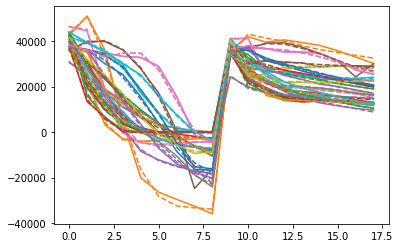

In [57]:
plt.plot(list(range(len(res_train.columns))), res_train.values[:30].T);
emdecomp = sklearn.decomposition.PCA(8).fit(res_train.values)
restrainpca = emdecomp.transform(res_train.values)
recreate = emdecomp.inverse_transform(restrainpca)
plt.plot(list(range(len(res_train.columns))), recreate[:30].T, linestyle="--");

In [58]:
pca_results = []
for emdec in range(8, 11):
    emdecomp = sklearn.decomposition.PCA(emdec).fit(res_train.values)
    restrainpca = emdecomp.transform(res_train.values)
    restestpca = emdecomp.transform(res_test.values)
    for dec in range(8, 12):
        decomposers = sklearn.decomposition.PCA(dec).fit(train.values)
        pca_train = decomposers.transform(train.values)
        pca_test = decomposers.transform(test.values)
        for pol in range(2, 4):
            poly = PolynomialFeatures(degree=pol)
            poly_train = poly.fit_transform(pca_train)
            poly_test = poly.fit_transform(pca_test)
            regression = linear_model.LinearRegression()
            poly_model = regression.fit(poly_train, restrainpca)
            score = poly_model.score(poly_test, restestpca)
            pca_results.append([dec, pol, score])
    print(emdec)
    print(pca_results)

8
[[8, 2, 0.5961309385005894], [8, 3, 0.6524559073268428], [9, 2, 0.6015629106125266], [9, 3, 0.6685268238036379], [10, 2, 0.6210104056108746], [10, 3, 0.6728117908664241], [11, 2, 0.6577441988676714], [11, 3, 0.6783484925464622]]
9
[[8, 2, 0.5961309385005894], [8, 3, 0.6524559073268428], [9, 2, 0.6015629106125266], [9, 3, 0.6685268238036379], [10, 2, 0.6210104056108746], [10, 3, 0.6728117908664241], [11, 2, 0.6577441988676714], [11, 3, 0.6783484925464622], [8, 2, 0.5627970084671663], [8, 3, 0.634022798569953], [9, 2, 0.5742667625216271], [9, 3, 0.6482016724409446], [10, 2, 0.5939855615733479], [10, 3, 0.6548905216030341], [11, 2, 0.6293211567341898], [11, 3, 0.646827352336348]]
10
[[8, 2, 0.5961309385005894], [8, 3, 0.6524559073268428], [9, 2, 0.6015629106125266], [9, 3, 0.6685268238036379], [10, 2, 0.6210104056108746], [10, 3, 0.6728117908664241], [11, 2, 0.6577441988676714], [11, 3, 0.6783484925464622], [8, 2, 0.5627970084671663], [8, 3, 0.634022798569953], [9, 2, 0.5742667625216271

In [59]:
pca_results = []
restrainpca = res_train.values 
restestpca = res_test.values
for dec in range(8, 13):
    decomposers = sklearn.decomposition.PCA(dec).fit(train.values)
    pca_train = decomposers.transform(train.values)
    pca_test = decomposers.transform(test.values)
    for pol in range(2, 5):
        poly = PolynomialFeatures(degree=pol)
        poly_train = poly.fit_transform(pca_train)
        poly_test = poly.fit_transform(pca_test)
        regression = linear_model.LinearRegression()
        poly_model = regression.fit(poly_train, restrainpca)
        score = poly_model.score(poly_test, restestpca)
        pca_results.append([dec, pol, score])
print(emdec)
print(pca_results)

10
[[8, 2, 0.6394070770442704], [8, 3, 0.6856170957795058], [8, 4, 0.6381691373621764], [9, 2, 0.6436674479667679], [9, 3, 0.6964927005015851], [9, 4, 0.46791500738139175], [10, 2, 0.6502931447070552], [10, 3, 0.6996432484376535], [10, 4, -0.24912256304424382], [11, 2, 0.6806103433595735], [11, 3, 0.7038037737853897], [11, 4, -1.6106001613767469], [12, 2, 0.6913752942496513], [12, 3, 0.7009742674781639], [12, 4, -7.752784609022323]]


In [60]:
# The direct approach works better than the PCA on emissions! 
pol = 3
dec = 11
decomposers = sklearn.decomposition.PCA(dec).fit(train.values)
pca_train = decomposers.transform(train.values)
pca_test = decomposers.transform(test.values)
poly = PolynomialFeatures(degree=pol)
poly_train = poly.fit_transform(pca_train)
poly_test = poly.fit_transform(pca_test)
regression = linear_model.LinearRegression()
poly_model = regression.fit(poly_train, res_train)
poly_test_pred = poly_model.predict(poly_test)

In [61]:
poly_test_pred

array([[40039.06035763, 37826.17252503, 25819.96245543, ...,
        23237.02371009, 22938.29298089, 22430.63873328],
       [39342.73770505, 38357.02141795, 17733.2734673 , ...,
        16742.78227047, 16016.12430629, 15400.1276133 ],
       [35350.09782604, 19033.39273817,  4306.35787935, ...,
        16428.47175438, 15629.97282558, 14999.08374614],
       ...,
       [40925.8703418 , 38118.99677629, 28865.48717033, ...,
        19103.04514224, 18145.14963864, 16734.58478045],
       [42008.5871458 , 41382.28079464, 28821.01466772, ...,
        20047.08796161, 19145.15420912, 18183.01277147],
       [38625.34776253, 24895.28682724, 19226.93817824, ...,
        15477.57712305, 14875.89346993, 14434.75059403]])

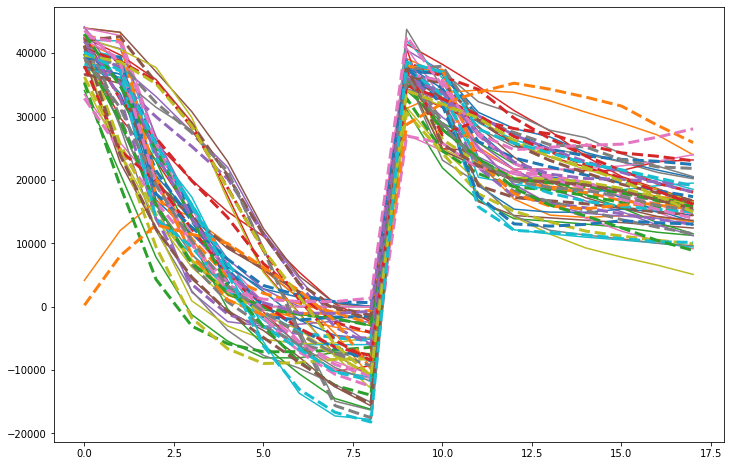

In [62]:
plt.figure(figsize=(12,8))
plt.plot(list(range(len(res_test.columns))), res_test.values[:30].T);
plt.plot(list(range(len(res_test.columns))), poly_test_pred[:30].T, linestyle="--", linewidth=3);

In [68]:
error = ((res_test.values - poly_test_pred)**2).mean()**0.5
error

3450.252912416846